<a href="https://colab.research.google.com/github/joshuabdixon/Dimensionality-Reduction-with-PCA-and-t-SNE-for-Automobile-Pricing/blob/main/Dimensionality_Reduction_with_PCA_and_t_SNE_for_Automobile_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction with PCA and t-SNE for Automobile Pricing

## Summary, Rationale, and Approach
This project explores the application of dimensionality reduction techniques, specifically Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE), to identify key automobile specifications that influence selling prices. The dataset contains 205 rows and 26 features related to various car attributes.

The goal is to identify patterns and clusters that help in predicting the automobile prices by reducing the dataset's dimensionality while retaining maximum information. This analysis can be applied across different contexts, such as feature selection for machine learning models, clustering in customer segmentation, or enhancing visualisation in exploratory data analysis.

## Key Techniques
- **Data Preprocessing:** Includes encoding categorical features, normalising continuous variables, and handling numerical conversions.
- **Dimensionality Reduction:** Applied PCA to capture maximum variance in the data and t-SNE for detailed visualisation and cluster exploration.
- **Evaluation:** Examined the explained variance using PCA components and experimented with different perplexity values in t-SNE for optimal clustering.

## Results & Insights
- **PCA:** Found that 26 components explain approximately 95% of the total variance in the dataset. The MI (Mutual Information) scores indicate that the first few components (especially PC1, PC7, and PC2) are highly relevant for predicting car prices.
- **t-SNE:** Explored various perplexity values to balance local and global structures in the data. A perplexity between 10 and 30 provided a clear visual representation of clusters without merging local details.
- **Predictive Potential:** The analysis revealed that certain specifications significantly influence car prices, suggesting that feature reduction can be a valuable step in developing accurate predictive models.

## Reflections
- **PCA's Linearity:** While effective in reducing dimensions, PCA is limited by its linear nature.
- **t-SNE's Complexity:** The results of t-SNE are sensitive to perplexity values and computationally intensive. Despite this, combining PCA and t-SNE provided an effective way to visualise complex data patterns.

## Contents
1. Import Libraries and Data Exploration
2. Initial Data Preprocessing
3. Data Normalisation
4. Principal Component Analysis (PCA)
5. t-distributed Stochastic Neighbor Embedding (t-SNE)
6. Thoughts on Predicting Automobile Prices
7. Reflections on Limitations and Next Steps

# Dimensionality Reduction

## Python Code - Structure
The code used to explore the Feature Engineering methods is structured as follows:

0. Import Libraries and Exploration

1. Initial Pre-Processing

2. Normalise the Data

3. Principle Component Analysis (PCA)

4. t-distributed Stochastic Neighbor Embedding (t-SNE)

## 0. Import Libraries and Exploration

In [1]:
# Step 1: Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_regression

# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"

In [2]:
# Read the CSV file into a new DataFrame.
data = pd.read_csv(url)

In [3]:
# Display the first 10 rows of the DataFrame.
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Understanding of Features

1. **car_ID**: A unique identifier for each car in the dataset.
2. **symboling**: Insurance risk rating associated with each car. Cars are rated from +3 (risky) to -3 (safe).
3. **CarName**: The brand and model of the car.
4. **fueltype**: Type of fuel the car uses (e.g., diesel, gasoline).
5. **aspiration**: The type of engine intake method (standard or turbocharged).
6. **doornumber**: Number of doors on the car (two or four).
7. **carbody**: The body style of the car (e.g., sedan, hatchback).
8. **drivewheel**: Type of drive wheel system (e.g., front-wheel drive, rear-wheel drive).
9. **enginelocation**: Location of the car engine (front or rear).
10. **wheelbase**: The distance between the front and rear wheels (in inches).
11. **carlength**: Length of the car (in inches).
12. **carwidth**: Width of the car (in inches).
13. **carheight**: Height of the car (in inches).
14. **curbweight**: The weight of the car without occupants or baggage (in pounds).
15. **enginetype**: Type of engine (e.g., overhead camshaft [OHC], overhead valve [OHV]).
16. **cylindernumber**: Number of cylinders in the engine of the car.
17. **enginesize**: Size of the car's engine (in cubic centimeters).
18. **fuelsystem**: Fuel system of the car (e.g., multi-point fuel injection [MPFI], direct injection).
19. **boreratio**: The ratio of the width of the cylinder bore to its stroke length.
20. **stroke**: The length of the piston stroke inside the engine (in inches).
21. **compressionratio**: Compression ratio of the engine.
22. **horsepower**: Engine power output (in horsepower).
23. **peakrpm**: Maximum revolutions per minute the engine can achieve.
24. **citympg**: Fuel efficiency in city driving conditions (in miles per gallon).
25. **highwaympg**: Fuel efficiency on the highway (in miles per gallon).
26. **price**: Selling price of the car (in US dollars).

## 1.0 Initial Pre-Processing

In [4]:
# Find missing values.
data.isnull().sum() # no missing values

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


####cylindernumber
- This variable was originally labeled with words. Converting it to a numeric format enables calculations and facilitates training machine learning models that require numerical input.

In [5]:
# Display unique values before conversion
print("Unique cylinder numbers:", data["cylindernumber"].unique(), "\n")

# Convert 'cylindernumber' from words to numbers
mapping_cylinders = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
data['cylindernumber'] = data['cylindernumber'].map(mapping_cylinders)

# Check the conversion results
print("Converted cylinder numbers (first 5 records):", data["cylindernumber"].head(5), "\n")


Unique cylinder numbers: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 

Converted cylinder numbers (first 5 records): 0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64 



#### One-Hot Encoding for Nominal Data

In [6]:
# Specifying nominal columns
cat_nominal_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# Initialise OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output =  False)

# Apply one-hot encoding to nominal categorical columns
one_hot_encoded = one_hot_encoder.fit_transform(data[cat_nominal_columns])

# Create a dataframe with one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns = one_hot_encoder.get_feature_names_out(cat_nominal_columns))

# Concatenate the one-hot encoded dataframe with the main dataframe
data = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
data = data.drop(cat_nominal_columns, axis = 1)

#### Ordinal Encoding

In [7]:
# Specifying the ordinal column
cat_ordinal_column = ['cylindernumber']

# Initialise Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

# Apply ordinal encoding to categorical ordinal column
ordinal_encoded = ordinal_encoder.fit_transform(data[cat_ordinal_column])

# Create a dataframe with ordinal encoded column
ordinal_df = pd.DataFrame(ordinal_encoded, columns = ordinal_encoder.get_feature_names_out(cat_ordinal_column))

# Concatenate the one-hot encoded dataframe with the main dataframe
data = pd.concat([data, ordinal_df], axis = 1)

# Drop the original categorical column
data = data.drop(cat_ordinal_column, axis = 1)
ordinal_df

,cylindernumber
0,2.0
1,2.0
2,4.0
3,2.0
4,3.0
...,...
200,2.0
201,2.0
202,4.0
203,4.0


In [8]:
# Checking the first few rows of the DataFrame to see the changes
data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 2.0 Normalise the Data
- The numerical data will be be standardised to ensure the distribution is centres around 0 with a standard deviation of 1.


In [9]:
# Initialse the StandardScaler
scaler = StandardScaler()

# List of numerical columns (X variables only)
original_numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
                              'curbweight', 'enginesize', 'boreratio', 'stroke',
                              'compressionratio', 'horsepower', 'peakrpm',
                              'citympg', 'highwaympg']

# Extracting the features for scaling
X = data[original_numerical_columns]

# Replace existing numerical columns with standardised values
data_scaled = scaler.fit_transform(X)

# Input into the main dataframe
data[original_numerical_columns] = data_scaled

# Set display options to show all columns
pd.set_option('display.max_columns', None)
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


## 3.0 Principal Component Analysis (PCA)
- The PCA will be performed on the normalised data.
- A sample is not required due to the small dataset size.
- The target variable (price) will be visualised using a continuous color gradient. Discretising the target variable was considered, but since the goal of this activity is to reduce features to optimise model predictions, the continuous color gradient method has been adopted. If the scope were to provide clear and distinct visualisations of price categories, the discretisation method would have been used instead.

In [10]:
# Specify the dependent and independent variables.
X = data.drop(['price','car_ID'], axis=1)
y = data['price']

print(X.shape)
print(y.shape)

(205, 192)
(205,)


In [11]:
# Apply PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [12]:
# Compare the shape of the normalised and PCA data.
print("Normalised data: ", X.shape)
print("PCA data for visualisation: ", X_pca.shape)

Normalised data:  (205, 192)
PCA data for visualisation:  (205, 2)


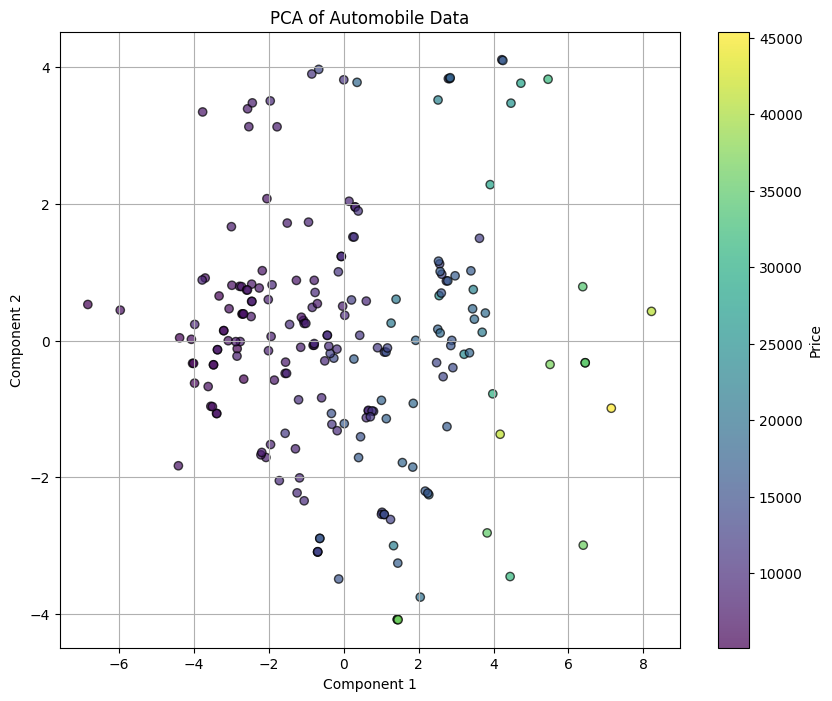

In [13]:
# Visualize the reduced data in 2D with discretized prices
def plot_embedding(X, title, y_values):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_values, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, label='Price')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_embedding(X_pca, "PCA of Automobile Data", y)

In [14]:
# Use PCA for feature selection.
def plot_variance(pca, width=8, dpi=100):
    # Create a figure.
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explain the variance.
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component",
               title="% Explained variance",
               ylim=(0.0, 1.0))

    # Use cumulative variance.
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component",
               title="% Cumulative variance",
               ylim=(0.0, 1.0))
    # Set up the figure.
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative variance'}, xlabel='Component'>],
      dtype=object)

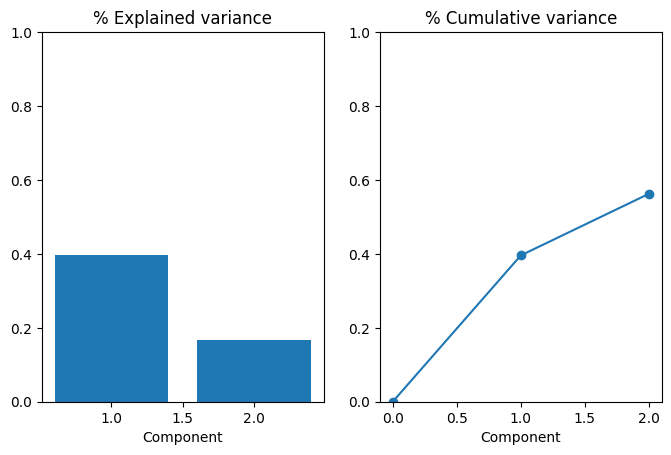

In [15]:
# View the variance and cumulative variance.
plot_variance(pca)

**Interpretation:**
- Component 1: The first point shows that Component 1 alone accounts for about 40% of the variance.
- Component 2: The second point shows that when adding Component 2, the cumulative explained variance increases to about 60%.

Let's try increasing the number of components...

In [16]:
# Set the number of components to 26.
pca_2 = PCA(n_components=26)
X_pca_2 = pca_2.fit_transform(X)

In [17]:
# Create a DataFrame
df = pd.DataFrame({
    'PC': range(1, len(pca_2.explained_variance_ratio_) + 1),
    'Explained Variance': pca_2.explained_variance_ratio_
})

# Print the DataFrame
print(df.to_string(index=False))

# Calculate the cumulative variance
explained_variance_cum = df['Explained Variance'].sum()
print(f"Cumulative Variance = {(explained_variance_cum*100):.2f}%")

 PC  Explained Variance
  1            0.395885
  2            0.166713
  3            0.082272
  4            0.059477
  5            0.038256
  6            0.031371
  7            0.025834
  8            0.021067
  9            0.019712
 10            0.017962
 11            0.015614
 12            0.011811
 13            0.009536
 14            0.008921
 15            0.007289
 16            0.006183
 17            0.005714
 18            0.004791
 19            0.003838
 20            0.003559
 21            0.003064
 22            0.002713
 23            0.002481
 24            0.002375
 25            0.001833
 26            0.001644
Cumulative Variance = 94.99%


array([<Axes: title={'center': '% Explained variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative variance'}, xlabel='Component'>],
      dtype=object)

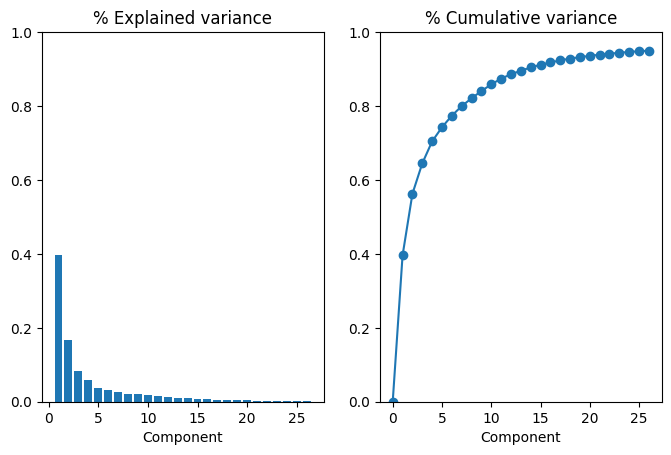

In [18]:
# View the variance and cumulative variance.
plot_variance(pca_2)

**Interpretation:**
- The first component explains around 39.5% of the variance, and the second component adds another 16.7%, and so on.  The explained variance drops off significantly after the first few components, indicating that the initial components capture most of the variance in the data.
- The cumulative variance plot shows that the first few components capture a substantial amount of the total variance. Specifically, the first 26 components collectively explain nearly 95% of the total variance in the dataset.


In [19]:
# Calculate the mutual information (MI) score if the number of PA components is 26.
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Convert the output into a DataFrame.
component_names = [f"PC{i+1}" for i in range(X_pca_2.shape[1])]
X_pca_2 = pd.DataFrame(X_pca_2, columns=component_names)
mi_scores = make_mi_scores(X_pca_2, y, discrete_features=False)

# View the output.
mi_scores

,MI Scores
PC1,0.935090
PC7,0.379361
PC2,0.277364
PC25,0.198557
PC9,0.184224
PC5,0.172658
PC14,0.118121
PC11,0.114600
PC23,0.096838
PC18,0.091635


**Interpretation:**
- The MI scores indicate that the first few principal components (particularly PC1, PC7, and PC2) are the most important for predicting the target variable (price).
- This information can help in selecting the most relevant components for building a predictive model, focusing on those with higher MI scores to optimise performance and reduce complexity.

## 4.0 t-distributed Stochastic Neighbor Embedding (t-SNE)

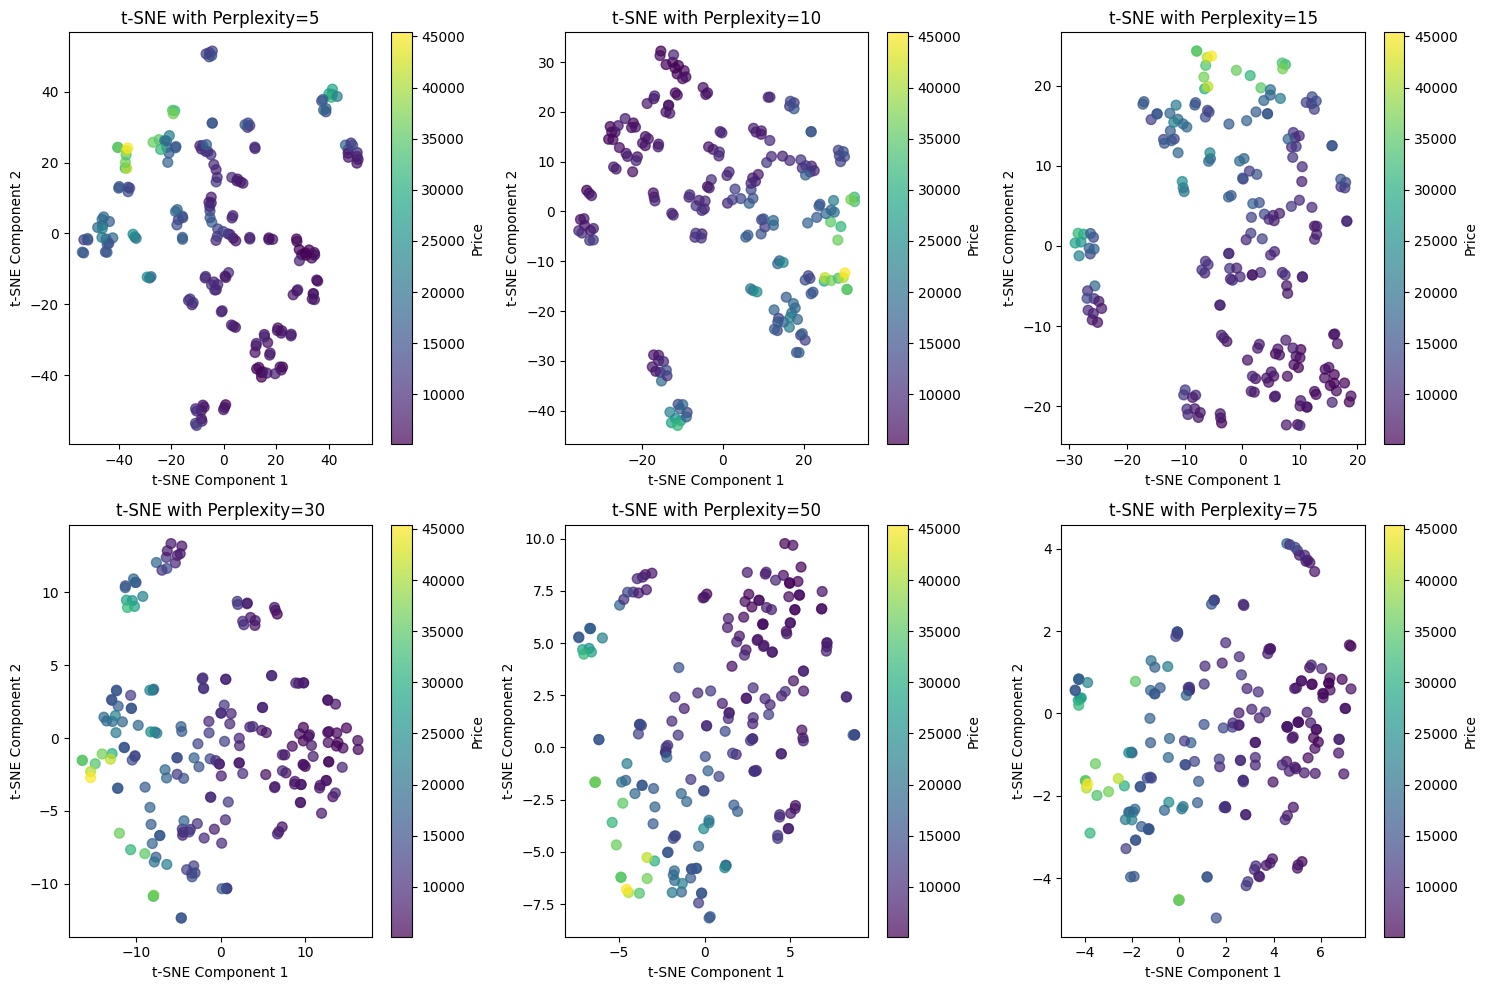

In [20]:
perplexities = [5, 10, 15, 30, 50, 75]

plt.figure(figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne_perplexity = tsne.fit_transform(X_pca_2)
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_tsne_perplexity[:, 0], X_tsne_perplexity[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(label='Price')
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()

### General Observations
- **Increasing perplexity:** Transition from local to global structure
- **Low Perplexity (5-10):** Highlights local structures and small clusters
- **Medium Perplexity (15-30):** Balances local and global structures. More distinct clusters with better group separation.
- **High Perplexity (50-75):** Emphasises global structures, merging local clusters, less local structure.

### Recommendations
- For this dataset, **perplexity between 10 and 30** provides a good balance, revealing distinct clusters without merging local details.